# Imports and Functions

In [17]:
import math 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.path as path
import pandas as pd

%matplotlib notebook
from numpy import load
global cm
global cm_bright
global wales
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

wales = load('walesoutline1.npy')
wales = path.Path(wales)

global threshold_low, threshold_high
threshold_low = -500
threshold_high = 0

In [18]:
def xnew(x): 
    return (-512+(((x+5)*(512--512))/(51+5)))
def ynew(y): 
    return (-512+(((y+2)*(512--512))/(53+2)))

def eggholder(x):
       
    return (-(x[1]+47)*(math.sin(math.sqrt(abs((x[0]/2)+(x[1]+47))))))-((x[0])*(math.sin(math.sqrt(abs((x[0])+(x[1]+47))))))

def eggholderColor(x, threshold_low, threshold_high):
    
    if threshold_low < eggholder((xnew(x[0]),xnew(x[1]))) <threshold_high:
        return 1
    else:
        return 0

<IPython.core.display.Javascript object>


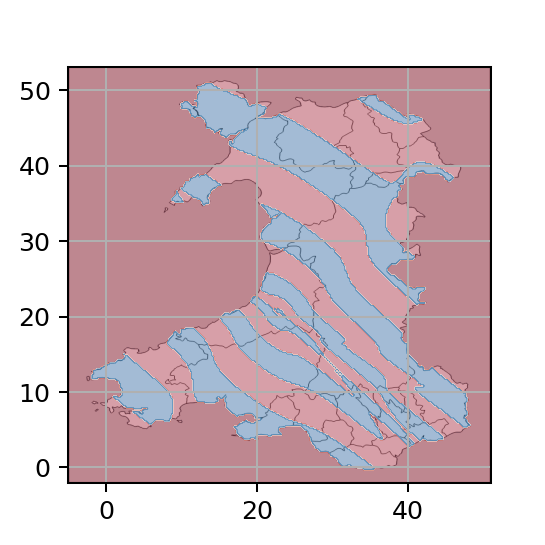

In [19]:
x_min, x_max = -5, 51 
y_min, y_max = -2, 53
h = .2  # step size in the mesh

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                 np.arange(y_min, y_max, h))

Zeggholder = []
eggholdercoords = np.c_[xx.ravel(), yy.ravel()]
for i in range(77000):
    Zeggholder.append(eggholderColor(eggholdercoords[i],threshold_low, threshold_high))

Big_df = pd.DataFrame(xx.ravel(), columns=['xx'])#
Big_df.insert(1, 'yy',yy.ravel())
Big_df.insert(2, 'model_predictions', Zeggholder)
Big_df.insert(3,'model_predictions_land', Zeggholder)

for i in range(77000):

        if (wales.contains_points([(Big_df.iat[i,0],Big_df.iat[i,1])])[0]):
            Big_df.loc[i, 'model_predictions_land'] = Big_df.iloc[i]['model_predictions']

        else:
            Big_df.loc[i, 'model_predictions_land'] = 0

model_predictions = Big_df["model_predictions_land"].to_numpy()

Contour_model = Big_df["model_predictions_land"].to_numpy()
Contour_model = Contour_model.reshape(xx.shape) 


global fig1,ax
fig1, ax = plt.subplots(figsize = (3,3))
ax.set_xlim(-5,51)
ax.set_ylim(-2,53)
img = plt.imread('WalesMap.png');
ax.imshow(img, extent=[-5, 51, -2, 53])
plt.grid()
ax.contourf(xx, yy, Contour_model, cmap=cm, alpha=
            0.4)


plt.plot()

plt.show()
fig1.show()
fig1.canvas.draw()